In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/letter-cg-data/letters_CG.txt


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('../input/letter-cg-data/letters_CG.txt',sep=' ')
onlydata=data.loc[:,'x-box':'yegvx']
onlydata.describe(include='all')

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,4.059642,7.025182,4.848244,5.288933,3.180915,6.169649,7.094102,5.947647,6.235255,8.084824,6.809808,10.737575,2.422797,8.616965,4.626243,8.893970
std,1.744379,3.327707,1.612338,2.156974,1.934883,1.296437,1.138498,1.268069,2.071898,2.059967,1.443088,2.022762,1.768471,1.081741,1.578873,1.397002
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,4.000000,0.000000,5.000000,2.000000,4.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,9.000000,1.000000,8.000000,4.000000,8.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,6.000000,7.000000,6.000000,6.000000,8.000000,7.000000,11.000000,2.000000,9.000000,4.000000,9.000000
75%,5.000000,9.000000,6.000000,7.000000,4.000000,7.000000,8.000000,7.000000,8.000000,9.000000,8.000000,12.000000,3.000000,9.000000,5.000000,10.000000
max,10.000000,15.000000,10.000000,9.000000,12.000000,11.000000,11.000000,10.000000,12.000000,13.000000,11.000000,15.000000,11.000000,13.000000,10.000000,14.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=onlydata.values
yCG=data.values[:,0]
y=np.zeros((yCG.size))
y[yCG=='G']=1
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# Standardize the x_train and x_test datasets
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

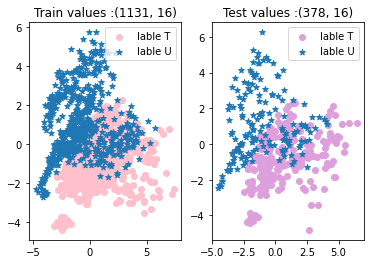

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
fig, (plttrain, plttest) = plt.subplots(1, 2)
datavl1=pca.fit_transform(X_train_scaled)
g11=datavl1[(y_train==1)]
g12=datavl1[(y_train==0)]
plttrain.set_title('Train values :'+ str(X_train_scaled.shape))
plttrain.scatter(g11[:,0],g11[:,1],marker='o', c='pink')
plttrain.scatter(g12[:,0],g12[:,1],marker='*')
plttrain.legend(['lable T','lable U'])
datavl2=pca.fit_transform(X_test_scaled)
g21=datavl2[(y_test==1)]
g22=datavl2[(y_test==0)]
plttest.set_title('Test values :'+str(X_test_scaled.shape))
plttest.scatter(g21[:,0],g21[:,1],marker='o', c='plum')
plttest.scatter(g22[:,0],g22[:,1],marker='*')
plttest.legend(['lable T','lable U'])
plt.savefig('lettersCG_Xtraintext.png')


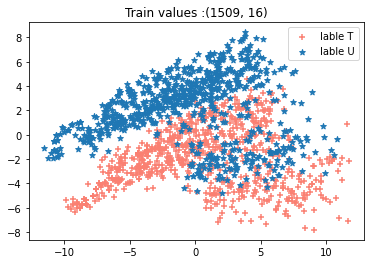

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
# fig, (plttrain, plttest) = plt.subplots(1, 2)
datavlx=pca.fit_transform(X)
gx1=datavlx[(y==1)]
gx2=datavlx[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(gx1[:,0],gx1[:,1],marker='+', c='salmon')
plt.scatter(gx2[:,0],gx2[:,1],marker='*')
plt.legend(['lable T','lable U'])
plt.savefig('lettersCG_X.png')

In [7]:
class RatingModel:
    def __init__(self, y_, y_Pr):
      self.y_=y_
      self.y_Pr=y_Pr
      self.TN=np.size(y_Pr[(y_Pr==-1)&(y_==y_Pr)])
      self.FN=np.size(y_Pr[(y_Pr==-1)&(y_!=y_Pr)])
      self.TP=np.size(y_Pr[(y_Pr==1)&(y_==y_Pr)])
      self.FP=np.size(y_Pr[(y_Pr==1)&(y_!=y_Pr)])
      self.y_[self.y_==0]=-1
      self.y_Pr[self.y_Pr==0]=-1
      # assert self.y_.set={1, -1}
      # assert self.y_Pr.set={1, -1}
    def __rep__():
        return ""
    def accur_Error(self, y_, y_Pr):
        rs=(self.TP+self.TN)/(y_.size)
        return [rs,(1-rs)]
    def sensitivity(self):
        P=np.size(self.y_[self.y_==1])
        return (self.TP)/(P)
    def specificity(self):
        N=np.size(self.y_[self.y_==-1])
        return (self.TN)/(N)
    def precision(self):
        rs=self.TP+self.FP
        return (self.TP)/(rs)
    def recall(self):
        rs=self.TP+self.FN
        return (self.TP)/(rs)
    def rating(self):
        return [self.accur_Error(self.y_, self.y_Pr), self.sensitivity(), self.specificity(), self.precision(), self.recall()]

In [8]:
class DecisionStump:
    def __init__(self, T=100):
        self.T = T
        pass

    def fit(self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray):
        T = self.T
        W=sample_weight
        nrow, ncol = X.shape
        assert nrow == y.size

        bestn = 0
        bestd = 1
        bestp = 0
        minerr = W.sum()
        for i in range(ncol):
            err, d, p = self._optimize(X[:, i], y, W, T)
            if err < minerr:
                minerr = err
                bestn = i
                bestd = d
                bestp = p
        
        self.features = ncol
        self.bestn = bestn
        self.bestd = bestd
        self.bestp = bestp

        return self

    def _optimize(self, X, y, W, T):
        X = X.flatten()
        min_x, max_x = X.min(), X.max()
        len_x = max_x - min_x
        
        bestd = 1
        bestp = min_x
        minerr = W.sum()

        if len_x > 0.0:
            for p in np.arange(min_x, max_x, len_x/T):
                for d in [-1, 1]:
                    gy = np.ones((y.size))
                    gy[X*d < p*d] = -1
                    err = np.sum((gy != y)*W)
                    if err < minerr:
                        minerr = err
                        bestd = d
                        bestp = p

        return minerr, bestd, bestp

    def predict(self, test_set : np.ndarray):
        nrow, ncol = test_set.shape

        assert ncol == self.features

        icol = test_set[:, self.bestn]
        h = np.ones((nrow))
        h[icol*self.bestd < self.bestp*self.bestd] = -1
        return h

In [9]:
class AdaBoost:
    def __init__(self , T, hmodel = DecisionStump()):
        self.T=T
        self.hmodel=hmodel
    def fit(self, X: np.ndarray, y_: np.ndarray, verbose=False):
      n = X.shape[0]
      T = self.T
      y=y_
      y[y==0]=-1
    # init numpy arrays
      self.D = np.zeros(shape=(T, n))
      self.h = np.zeros(shape=T, dtype=object)
      self.alpha = np.zeros(shape=T)
      self.errors = np.zeros(shape=T)
      self.ratting = np.zeros(shape=(T,2))

      # initialize weights uniformly
      self.D[0] = np.ones(shape=n) / n

      for t in range(T):
          # fit  weak learner
          D_ = self.D[t]
          h_ = DecisionStump(60)
          h_ = h_.fit(X, y, D_)

          # calculate error and stump weight from weak learner prediction
          Pr_ = h_.predict(X)
          error_ = D_[(Pr_ != y)].sum()# / n
          alpha_ = np.log((1 - error_) / error_) / 2

          # update sample weights
          D_new = (
              D_ * np.exp(-alpha_ * y * Pr_)
          )
          
          D_new /= D_new.sum()

          # If not final iteration, update sample weights for t+1
          if t+1 < T:
              self.D[t+1] = D_new

          # save results of iteration
          self.h[t] = h_
          self.alpha[t] = alpha_
          self.errors[t] = error_
          # ae=np.array([0,0])
          if t>0:
            Pr_temp=self.predictmodul(X,t)
            modelra=RatingModel(y, Pr_temp)
            self.ratting[t,:]=modelra.accur_Error(y, Pr_temp)
          if verbose: print('Uyên {0}-th weak classifier: accuracy={1}, error={2}'.format (t, self.ratting[t,0], self.ratting[t,1]))
      return self
    def predict(self, X):
        Pr_ = np.array([h_.predict(X) for h_ in self.h])
        return np.sign(np.dot(self.alpha, Pr_))
    def predictmodul(self, X, i):
        h_temp=self.h[:i]
        alpha_temp=self.alpha[:i]
        Pr_ = np.array([h_.predict(X) for h_ in h_temp])
        return np.sign(np.dot(alpha_temp, Pr_))


In [10]:
model=AdaBoost(50)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1
# print(Pr, y_test)

Uyên 0-th weak classifier: accuracy=0.0, error=0.0
Uyên 1-th weak classifier: accuracy=0.784261715296198, error=0.21573828470380196
Uyên 2-th weak classifier: accuracy=0.784261715296198, error=0.21573828470380196
Uyên 3-th weak classifier: accuracy=0.8470380194518126, error=0.15296198054818744
Uyên 4-th weak classifier: accuracy=0.8470380194518126, error=0.15296198054818744
Uyên 5-th weak classifier: accuracy=0.8753315649867374, error=0.12466843501326264
Uyên 6-th weak classifier: accuracy=0.874447391688771, error=0.12555260831122905
Uyên 7-th weak classifier: accuracy=0.8947833775419982, error=0.10521662245800179
Uyên 8-th weak classifier: accuracy=0.8894783377541998, error=0.11052166224580018
Uyên 9-th weak classifier: accuracy=0.9045092838196287, error=0.0954907161803713
Uyên 10-th weak classifier: accuracy=0.9018567639257294, error=0.09814323607427056
Uyên 11-th weak classifier: accuracy=0.9151193633952255, error=0.08488063660477452
Uyên 12-th weak classifier: accuracy=0.9071618037

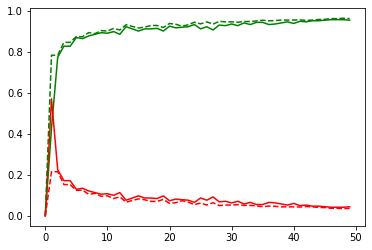

In [11]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'g-', label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-', label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'g--', label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--', label='Train error')


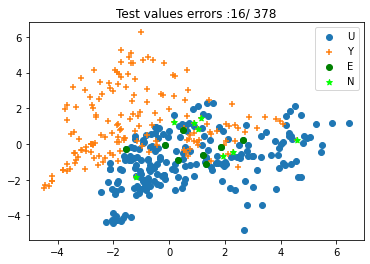

In [12]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
# for i in range(y_new.shape[0]):
#   if y_new[i]!=Pr[i]: 
#     sumerror+=1
sumerror=np.size(y_new[Pr!=y_new])
gT1=datavl2[(Pr==1)]
gT0=datavl2[(Pr==-1)]
gF1=datavl2[(y_new!=Pr)&(Pr==1)]
gF0=datavl2[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))
plt.scatter(gT1[:,0],gT1[:,1], marker='o')
plt.scatter(gT0[:,0],gT0[:,1], marker='+')
plt.scatter(gF1[:,0],gF1[:,1], c="green", marker='o')
plt.scatter(gF0[:,0],gF0[:,1], c="lime", marker='*')
plt.legend([ 'U','Y','E','N'])
plt.savefig('lettersCG_XtextError.png')